# EDA and Model Building

In [1]:
# import the necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the pre-processed dataset

data = pd.read_csv('D:/Home LLC Assignmemnt/Final/HOME_LLC_Preprocessed_Dataset.csv')

In [3]:
# to get the first 5 rows
data.head()

,DATE,CSUSHPISA,Year,Month,Crude oil (WTISPLC),COMPUTSA(Construction materials cost),Value(Consumer Confidence),CUUR0000SEHA(Price to Rent),Q4TR771BIS(Real Estate Market Index,GDP,...,GDP Per Capita(US $),Annual Growth Rate,Inflation Rate(%),Annual Change(Inflation Rate),Poverty Rate % Under US $5.50 Per Day,Change(Poverty Rate),Population,Annual Growth Rate(Population),Unemployement Rate %,Annual Change(US unemployment rate)
0,2000-12-31,109.493,2000.5,6.5,29.02,1488.5,101.3706,187.9,-1.3265,10439.025,...,36329.9561,5.26,3.3769,1.19,1.5,0.0,282398554.0,1.150000,3.99,-0.23
1,2001-01-01,109.846,2001.0,1.0,29.58,1456.0,101.1055,188.2,-1.3265,10439.025,...,36329.9561,5.26,3.3769,1.19,1.5,0.0,282634857.0,1.145385,3.99,-0.23
2,2001-02-01,110.499,2001.0,2.0,29.61,1536.0,100.7179,188.9,-1.3265,10439.025,...,36329.9561,5.26,3.3769,1.19,1.5,0.0,282871160.0,1.140769,3.99,-0.23
3,2001-03-01,111.108,2001.0,3.0,27.24,1470.0,100.5507,189.6,-1.3265,10472.879,...,36329.9561,5.26,3.3769,1.19,1.5,0.0,283107463.0,1.136154,3.99,-0.23
4,2001-04-01,111.651,2001.0,4.0,27.41,1574.0,100.5172,190.2,-1.3265,10472.879,...,36329.9561,5.26,3.3769,1.19,1.5,0.0,283343766.0,1.131538,3.99,-0.23


In [4]:
# to get the shape
data.shape

(287, 26)

In [5]:
# to get the info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 26 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   DATE                                       287 non-null    object 
 1   CSUSHPISA                                  287 non-null    float64
 2   Year                                       287 non-null    float64
 3   Month                                      287 non-null    float64
 4   Crude oil (WTISPLC)                        287 non-null    float64
 5   COMPUTSA(Construction materials cost)      287 non-null    float64
 6   Value(Consumer Confidence)                 287 non-null    float64
 7   CUUR0000SEHA(Price to Rent)                287 non-null    float64
 8   Q4TR771BIS(Real Estate Market Index        287 non-null    float64
 9    GDP                                       287 non-null    float64
 10   Per Capita               

In [6]:
# to get the data types alone
data.dtypes

DATE                                          object
CSUSHPISA                                    float64
Year                                         float64
Month                                        float64
Crude oil (WTISPLC)                          float64
COMPUTSA(Construction materials cost)        float64
Value(Consumer Confidence)                   float64
CUUR0000SEHA(Price to Rent)                  float64
Q4TR771BIS(Real Estate Market Index          float64
 GDP                                         float64
 Per Capita                                  float64
 Growth Rate                                 float64
RSAHORUSQ156S(US national home ownership)    float64
BOGZ1FL513178005Q(US Property Tax)           float64
 GDP Growth (%)                              float64
 Annual Change                               float64
GDP Per Capita(US $)                         float64
Annual Growth Rate                           float64
Inflation Rate(%)                            f

In [7]:
# to find the Correlation matrix
corr_matrix = data.corr()
corr_matrix

,CSUSHPISA,Year,Month,Crude oil (WTISPLC),COMPUTSA(Construction materials cost),Value(Consumer Confidence),CUUR0000SEHA(Price to Rent),Q4TR771BIS(Real Estate Market Index,GDP,Per Capita,...,GDP Per Capita(US $),Annual Growth Rate,Inflation Rate(%),Annual Change(Inflation Rate),Poverty Rate % Under US $5.50 Per Day,Change(Poverty Rate),Population,Annual Growth Rate(Population),Unemployement Rate %,Annual Change(US unemployment rate)
CSUSHPISA,1.000000,0.793942,0.069013,0.209783,0.118434,-0.165886,0.859798,0.136424,0.791775,0.801050,...,0.851824,0.293795,0.172418,0.296860,-0.502368,-0.616961,0.763021,-0.909334,-0.210264,-0.147246
Year,0.793942,1.000000,0.009505,0.305030,-0.407985,-0.110519,0.986201,0.536755,0.991342,0.988584,...,0.985820,0.007956,-0.169160,0.144575,-0.180052,-0.466523,0.997207,-0.900773,0.047704,-0.129692
Month,0.069013,0.009505,1.000000,0.019612,0.002119,-0.098238,0.061904,-0.007625,0.048772,0.049629,...,0.015327,0.011849,0.027582,0.012325,-0.013605,-0.010854,0.046628,-0.059720,-0.007639,-0.007032
Crude oil (WTISPLC),0.209783,0.305030,0.019612,1.000000,-0.521144,-0.574520,0.250335,0.366867,0.279501,0.287306,...,0.297284,0.063177,0.102815,0.123921,0.012294,-0.262905,0.318277,-0.232365,0.521918,-0.108272
COMPUTSA(Construction materials cost),0.118434,-0.407985,0.002119,-0.521144,1.000000,0.405855,-0.305701,-0.639138,-0.366675,-0.352907,...,-0.332720,0.393130,0.332131,0.134663,-0.287600,-0.066956,-0.444053,0.163733,-0.598941,-0.079596
Value(Consumer Confidence),-0.165886,-0.110519,-0.098238,-0.574520,0.405855,1.000000,-0.132328,-0.082516,-0.041983,-0.043764,...,-0.157212,0.000696,-0.272691,-0.126584,0.336482,0.214707,-0.101015,0.237517,-0.404639,-0.127919
CUUR0000SEHA(Price to Rent),0.859798,0.986201,0.061904,0.250335,-0.305701,-0.132328,1.000000,0.455209,0.978864,0.977177,...,0.992296,0.070171,-0.081138,0.191133,-0.290966,-0.513066,0.976572,-0.937118,-0.046995,-0.129806
Q4TR771BIS(Real Estate Market Index,0.136424,0.536755,-0.007625,0.366867,-0.639138,-0.082516,0.455209,1.000000,0.511598,0.499026,...,0.447015,-0.475633,-0.493454,-0.341968,0.095607,-0.251259,0.560196,-0.360010,0.471731,0.243075
GDP,0.791775,0.991342,0.048772,0.279501,-0.366675,-0.041983,0.978864,0.511598,1.000000,0.999490,...,0.979700,0.025547,-0.171295,0.135900,-0.142850,-0.458924,0.992884,-0.868644,-0.026245,-0.153070
Per Capita,0.801050,0.988584,0.049629,0.287306,-0.352907,-0.043764,0.977177,0.499026,0.999490,1.000000,...,0.979589,0.036995,-0.160052,0.139395,-0.143937,-0.464374,0.990023,-0.867009,-0.035871,-0.158530


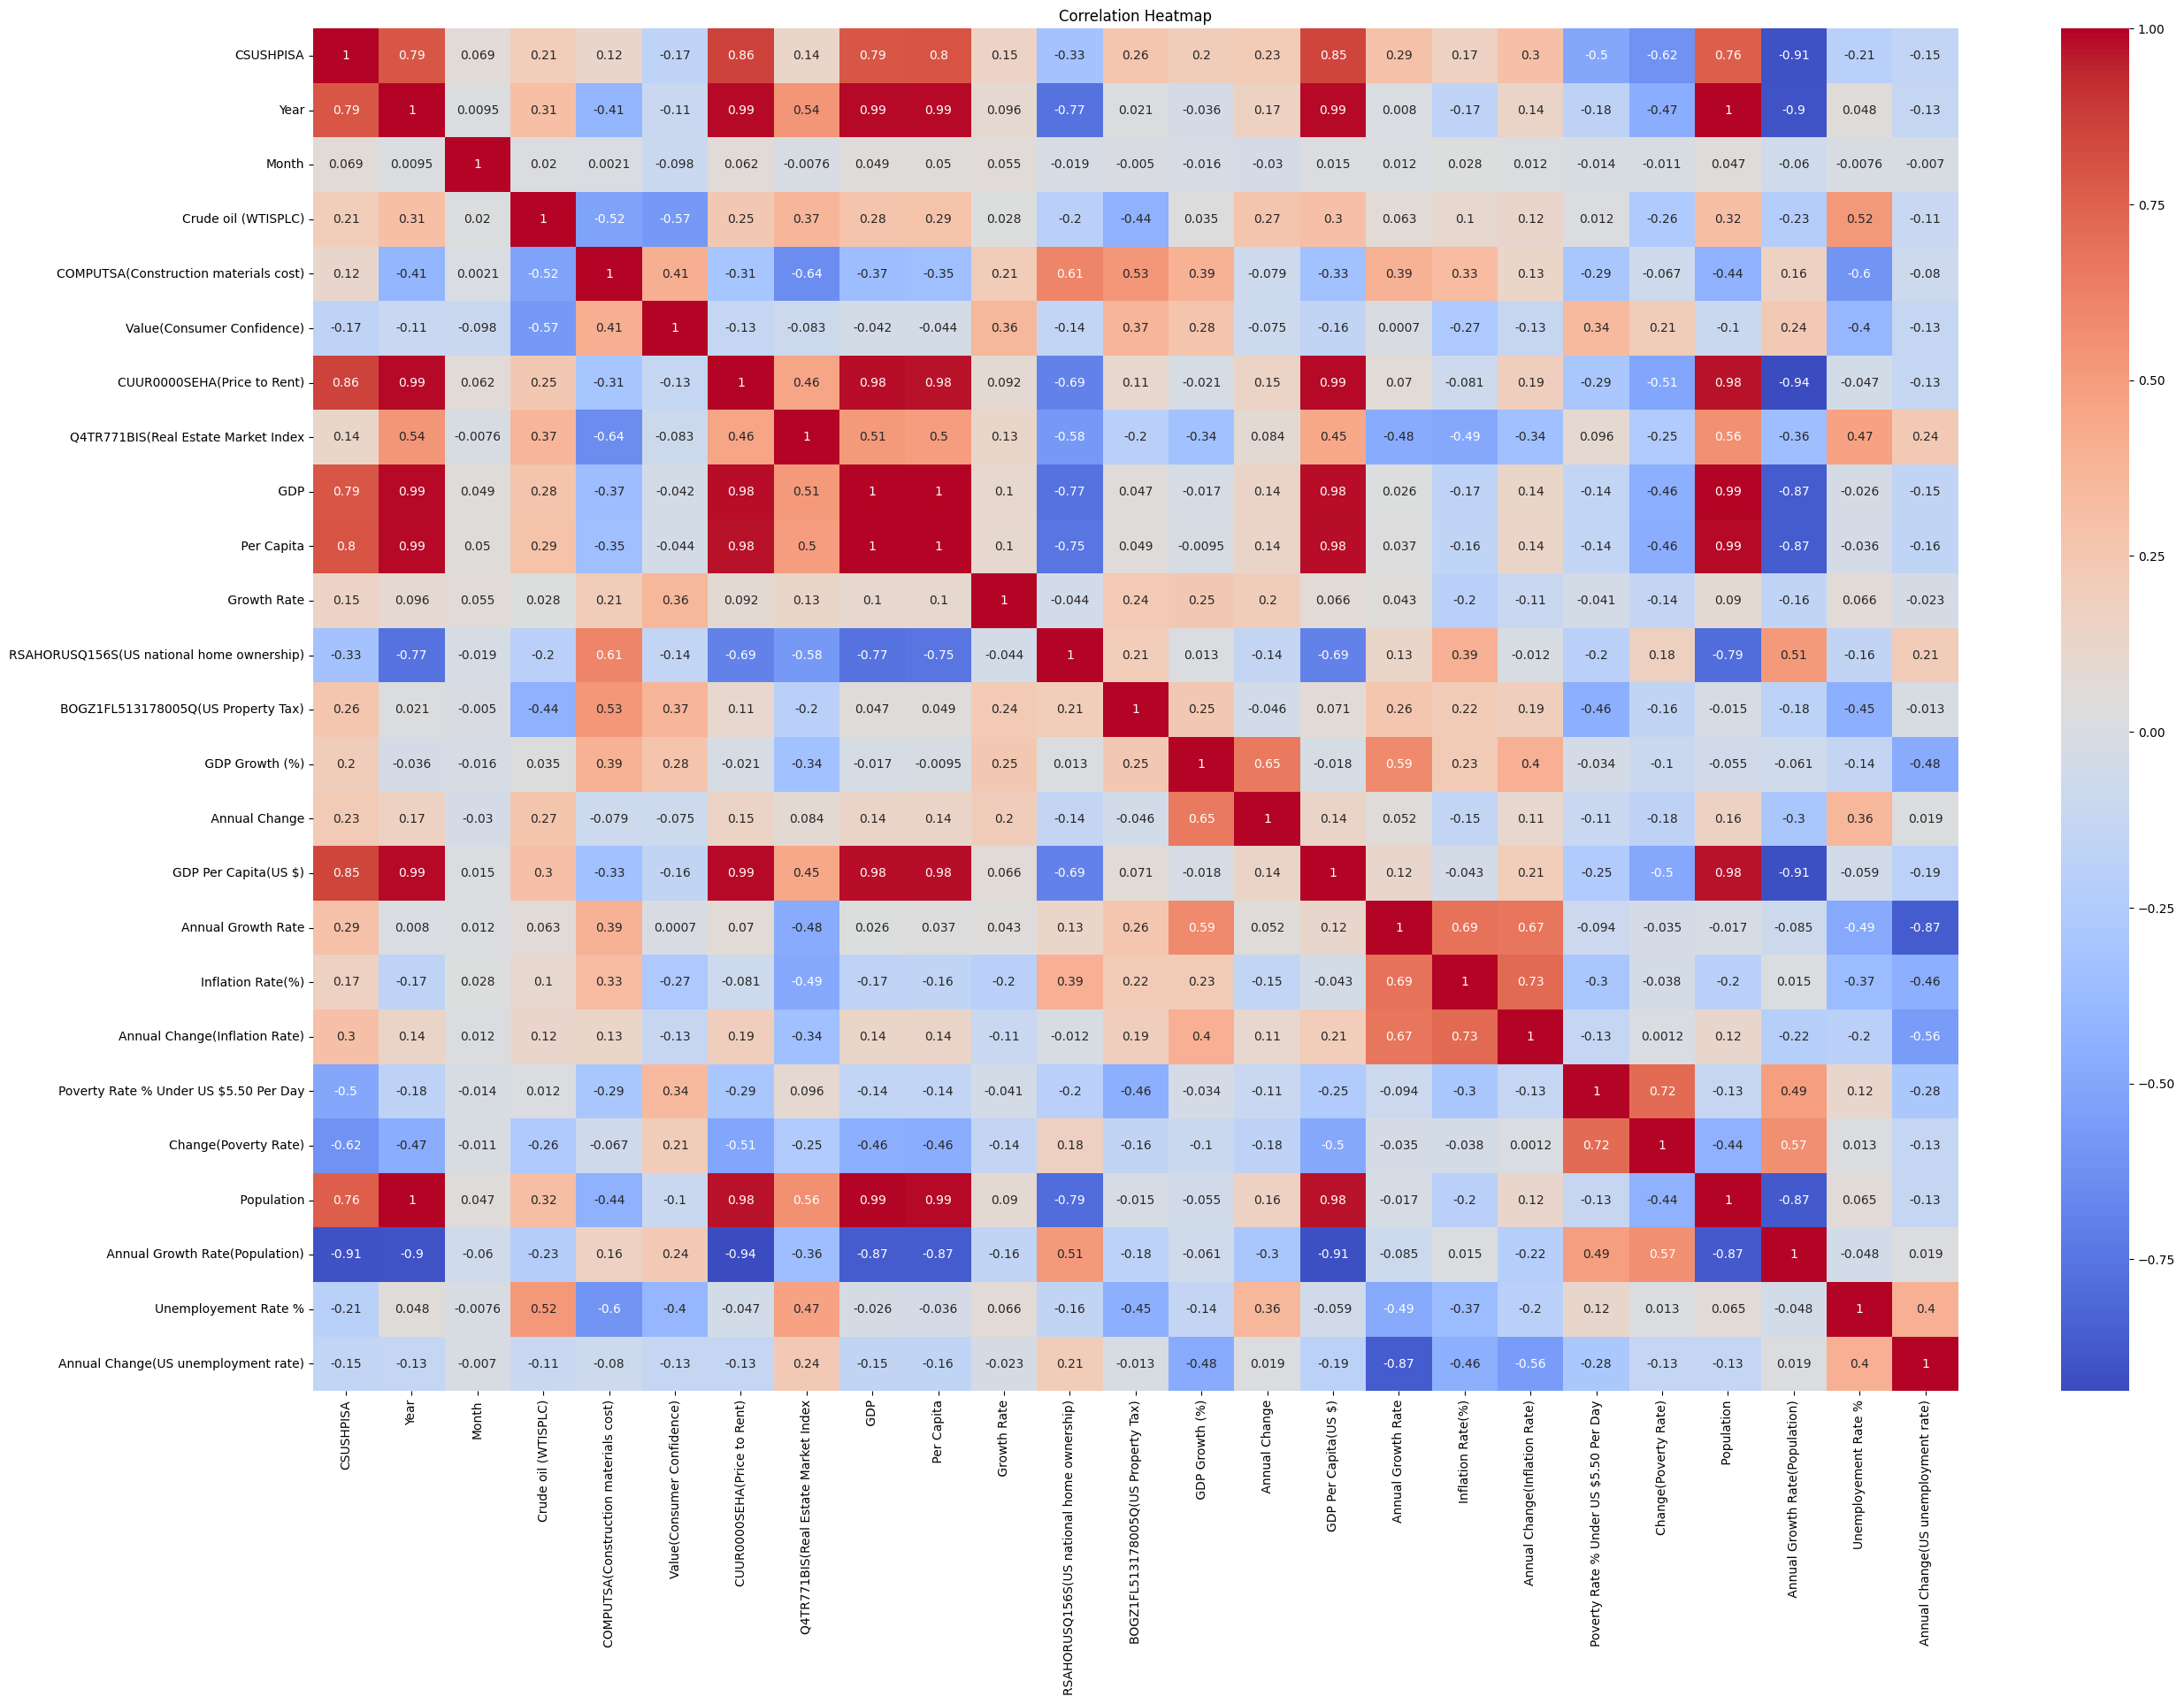

In [8]:
# to Visualize correlations
plt.figure(figsize=(30, 20))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

From the above Heat map visual itis clear that the target variable has high co-relation with the features called Price to Rent, Year, Population and GDP per capita. 

At the same time the target variable has a minimum negative co-relation with the features called Unemployement rate, Poverty Rate, US national home ownership and Consumer Confidence.

In [9]:
# to get the columns
data.columns

Index(['DATE', 'CSUSHPISA', 'Year', 'Month', 'Crude oil (WTISPLC)',
       'COMPUTSA(Construction materials cost)', 'Value(Consumer Confidence)',
       'CUUR0000SEHA(Price to Rent)', 'Q4TR771BIS(Real Estate Market Index',
       ' GDP', ' Per Capita', ' Growth Rate',
       'RSAHORUSQ156S(US national home ownership)',
       'BOGZ1FL513178005Q(US Property Tax)', ' GDP Growth (%)',
       ' Annual Change', 'GDP Per Capita(US $)', 'Annual Growth Rate',
       'Inflation Rate(%)', 'Annual Change(Inflation Rate)',
       'Poverty Rate % Under US $5.50 Per Day', 'Change(Poverty Rate)',
       ' Population', ' Annual Growth Rate(Population)',
       'Unemployement Rate %', 'Annual Change(US unemployment rate)'],
      dtype='object')

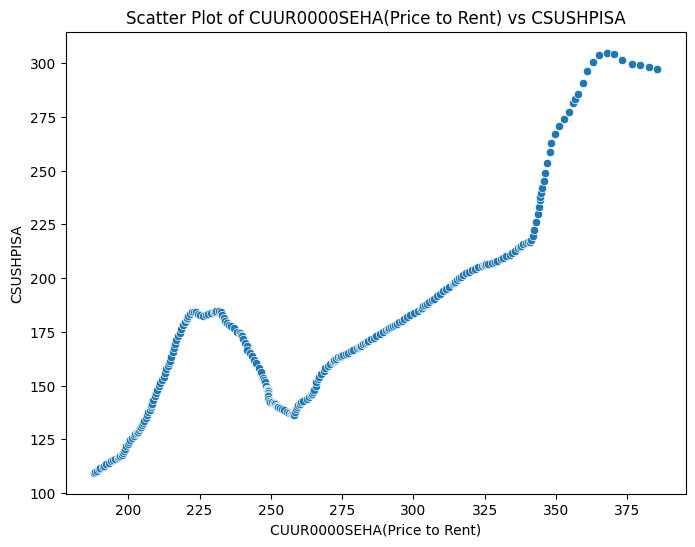

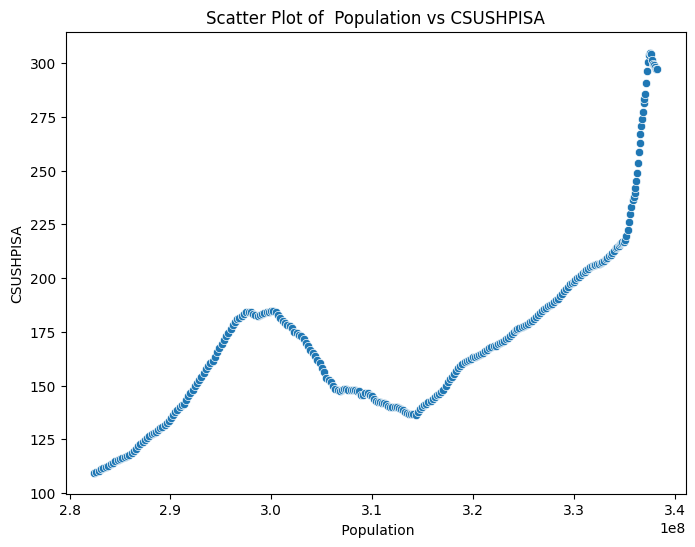

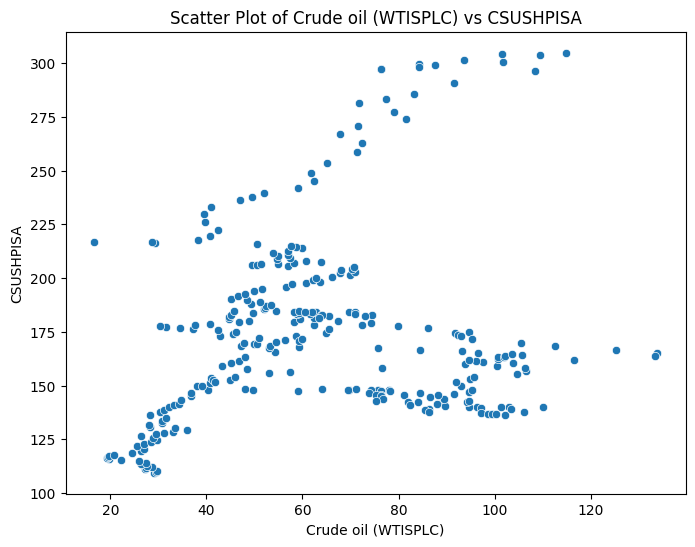

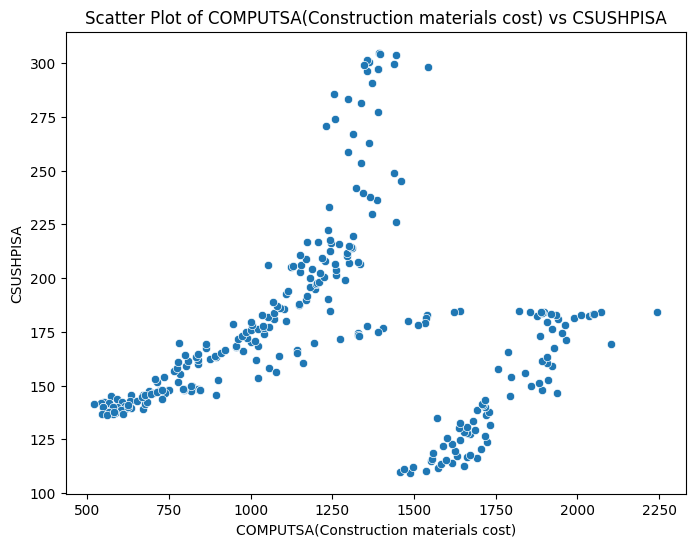

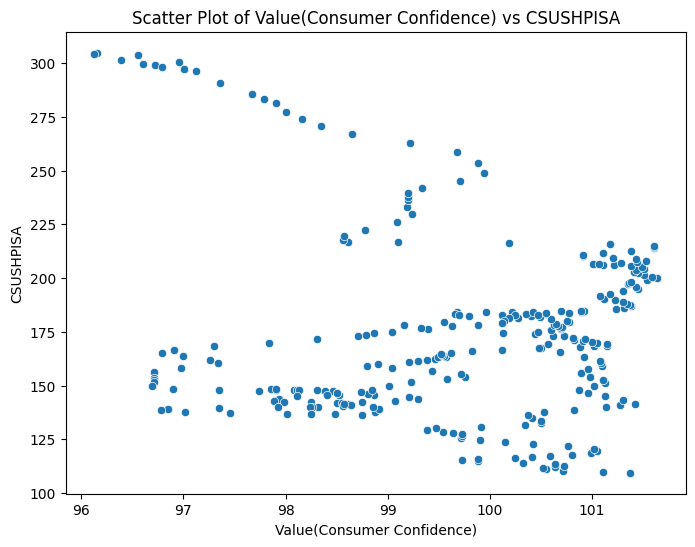

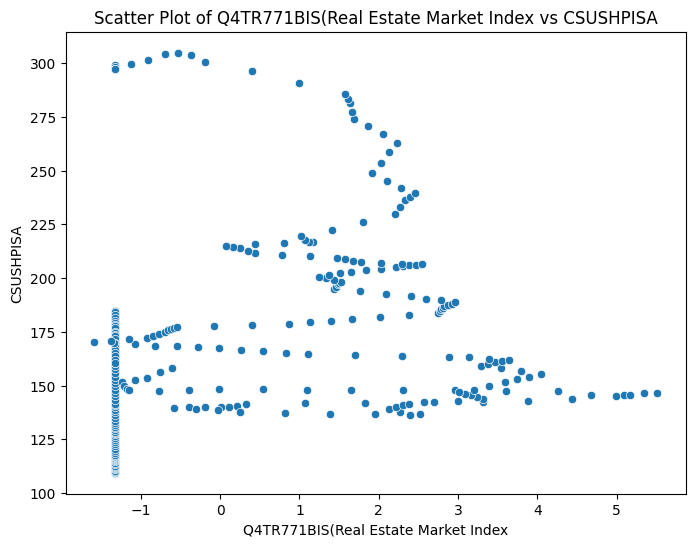

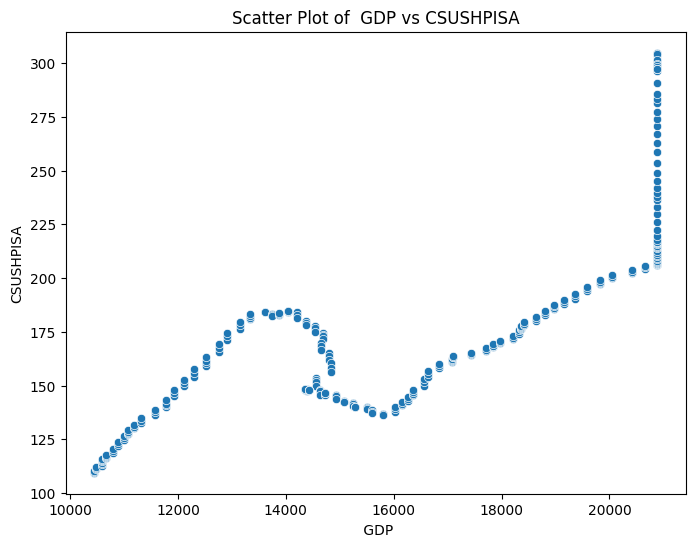

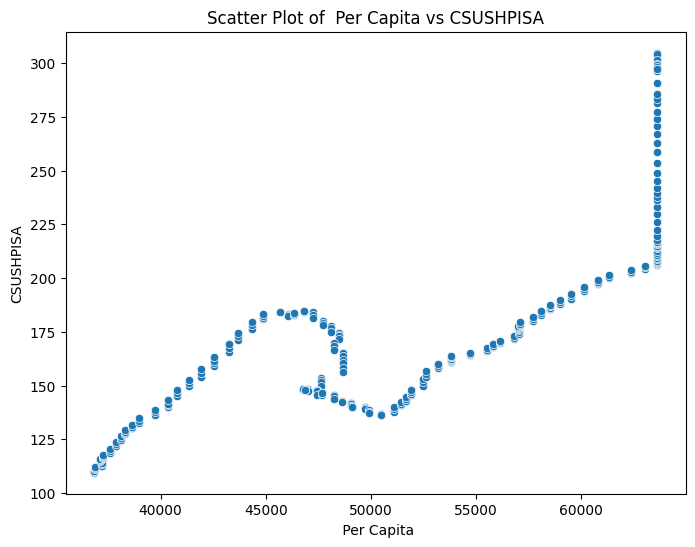

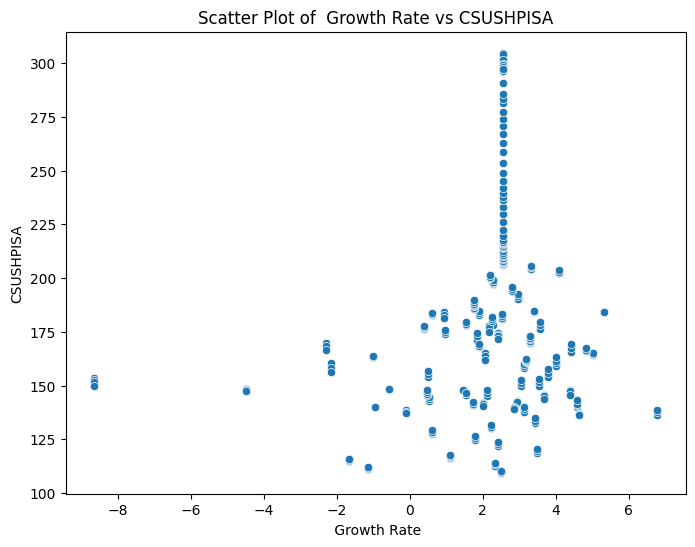

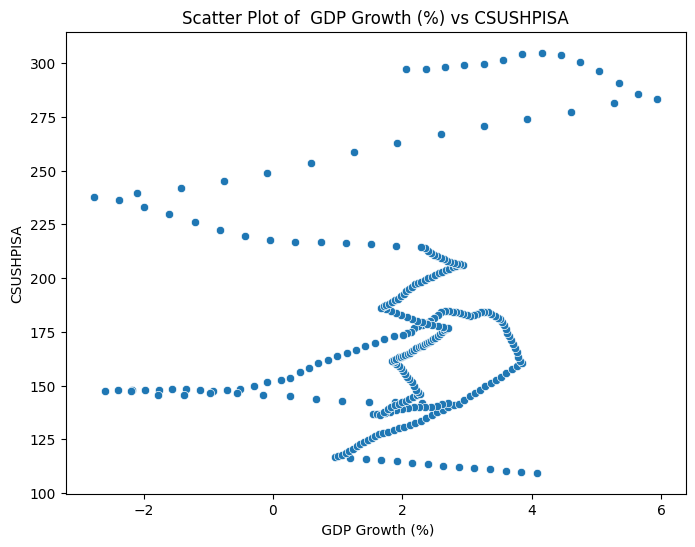

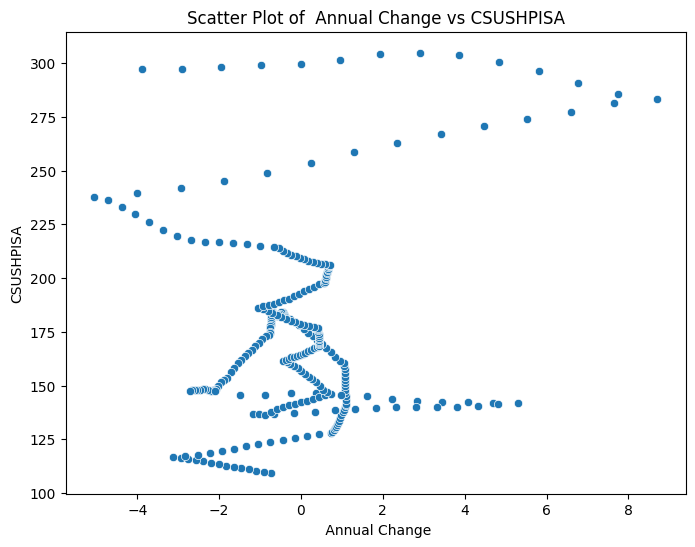

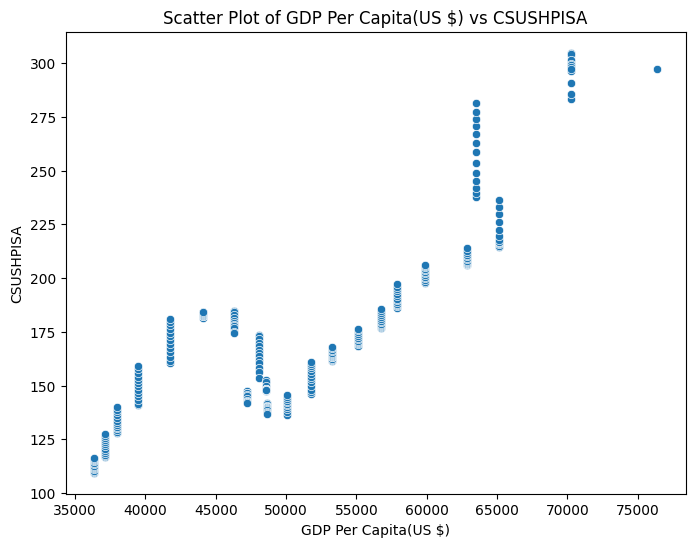

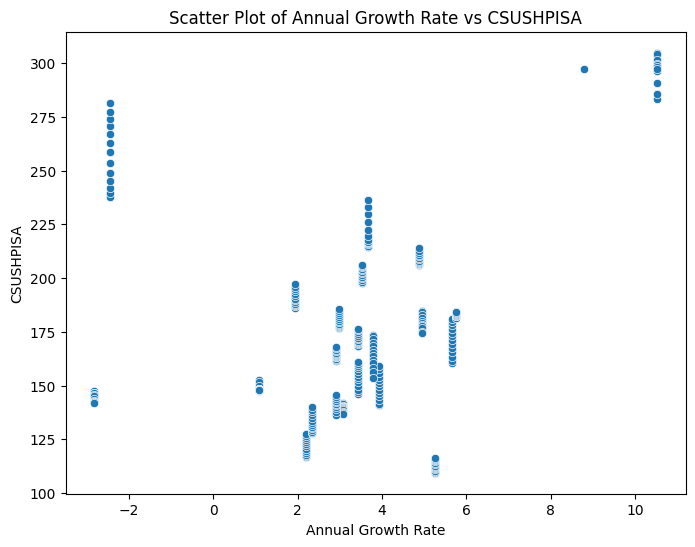

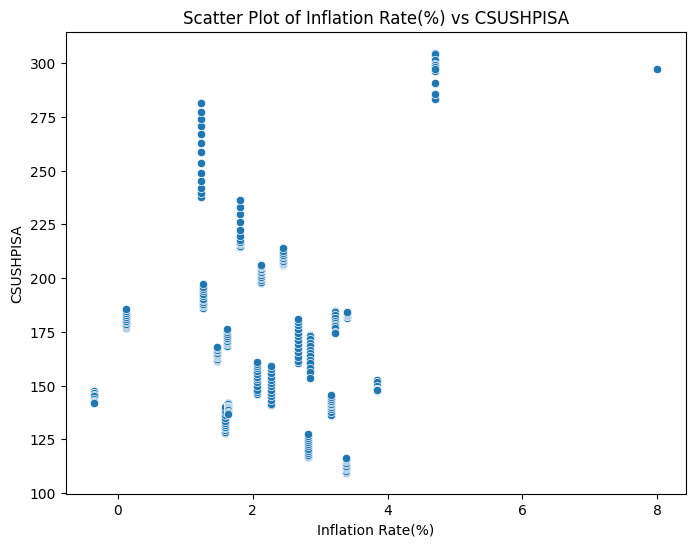

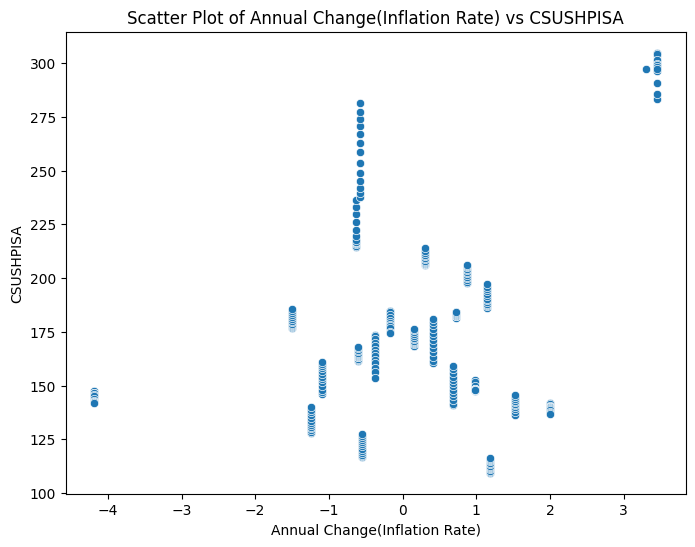

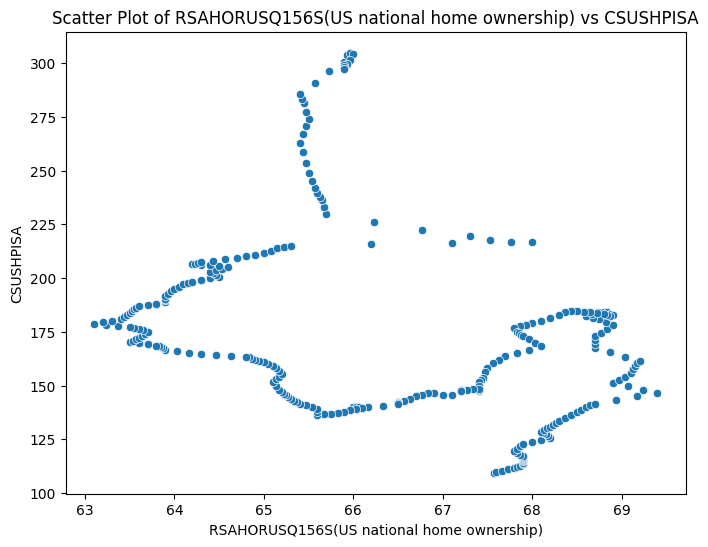

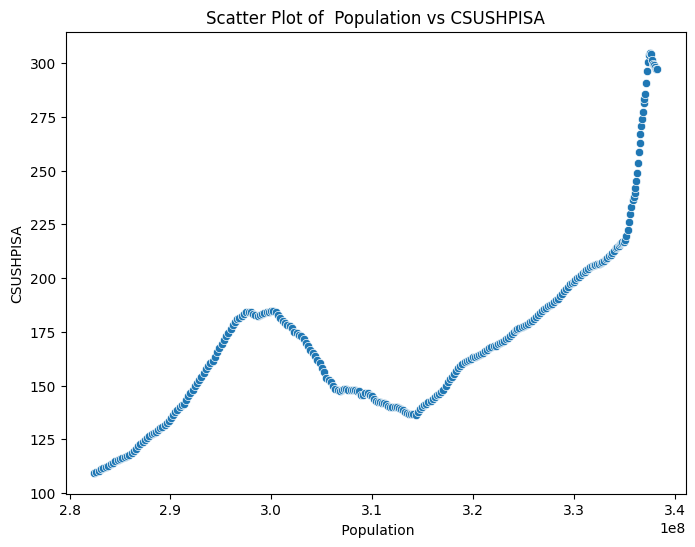

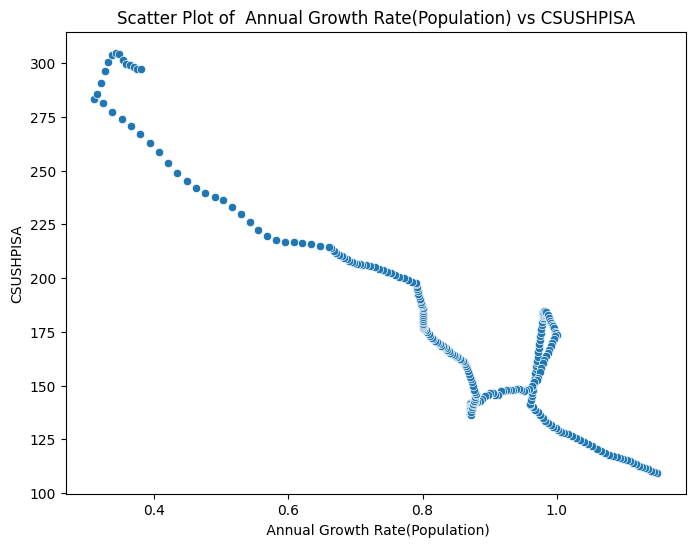

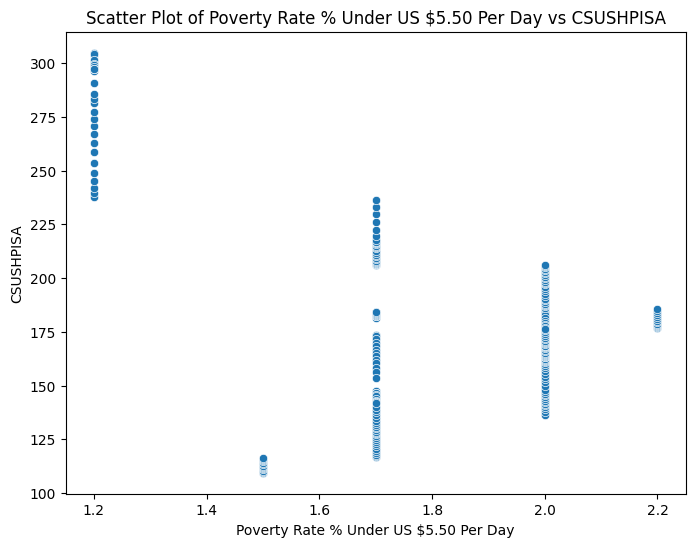

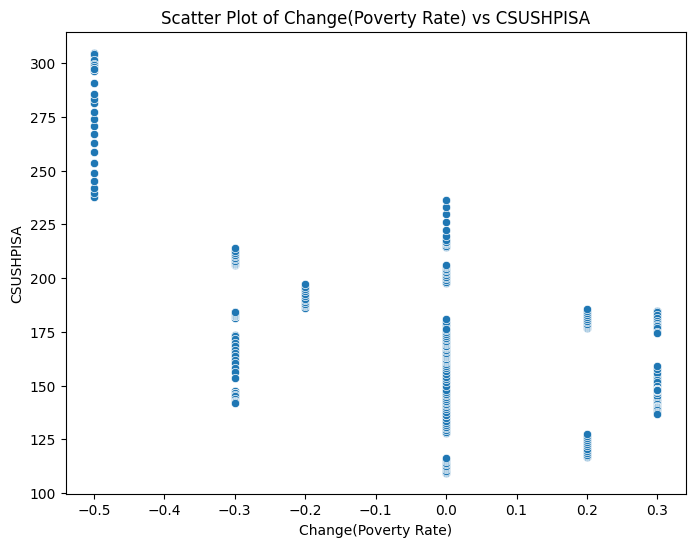

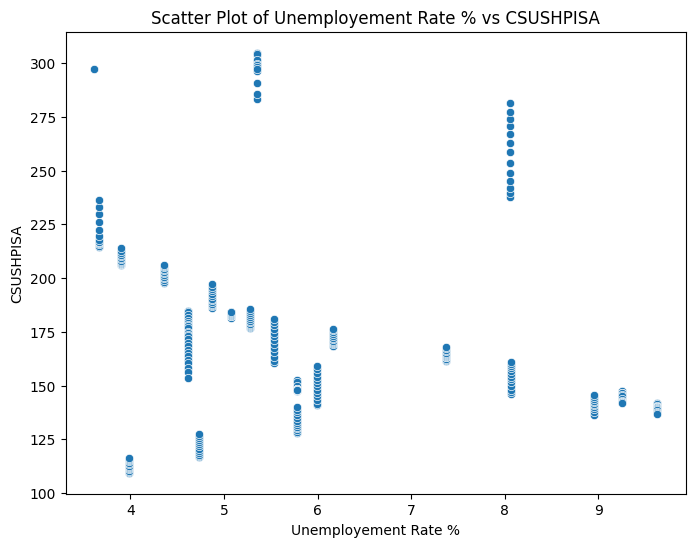

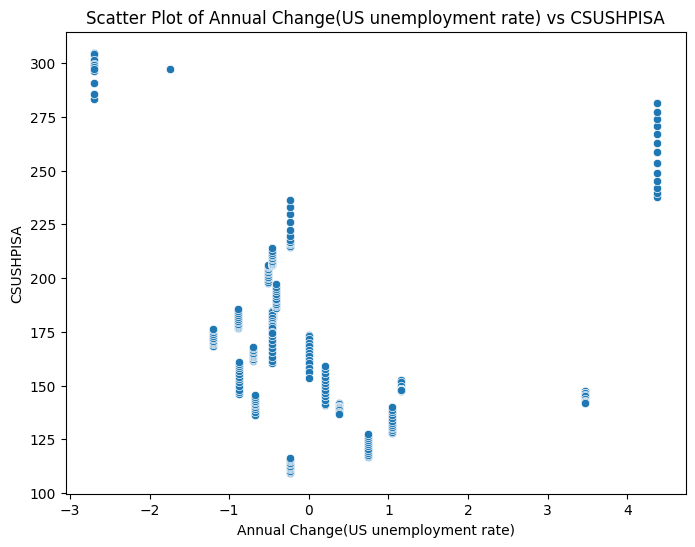

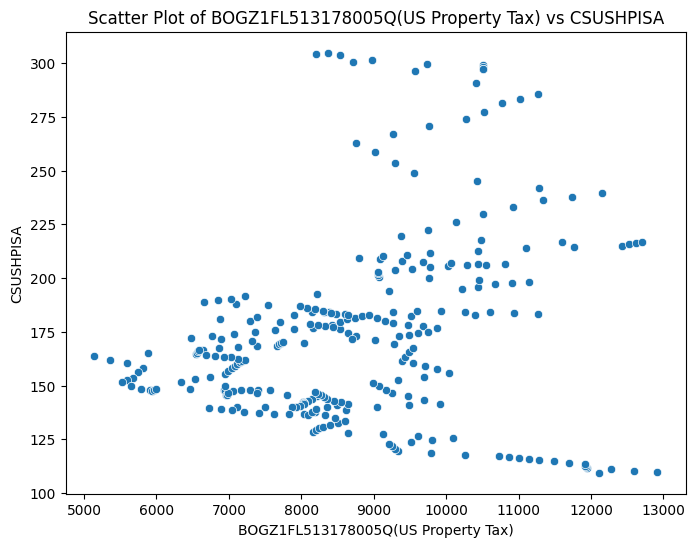

In [11]:
# List of features to plot
features_to_plot = ['CUUR0000SEHA(Price to Rent)', ' Population', 'Crude oil (WTISPLC)',
                         'COMPUTSA(Construction materials cost)', 'Value(Consumer Confidence)', 
                         'Q4TR771BIS(Real Estate Market Index', ' GDP', ' Per Capita', ' Growth Rate',
                       ' GDP Growth (%)',' Annual Change', 'GDP Per Capita(US $)', 
                        'Annual Growth Rate', 'Inflation Rate(%)', 'Annual Change(Inflation Rate)', 
                       'RSAHORUSQ156S(US national home ownership)', ' Population', ' Annual Growth Rate(Population)',
                       'Poverty Rate % Under US $5.50 Per Day', 'Change(Poverty Rate)', 'Unemployement Rate %',
                        'Annual Change(US unemployment rate)', 'BOGZ1FL513178005Q(US Property Tax)']

# Create separate scatter plots for each pair of features
for feature in features_to_plot:
    plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
    sns.scatterplot(data=data, x=feature, y="CSUSHPISA")
    plt.xlabel(feature)
    plt.ylabel("CSUSHPISA")
    plt.title(f"Scatter Plot of {feature} vs CSUSHPISA")
    plt.show()

In [13]:
# import the necessary libraries to build the model

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# Split data into training and testing sets
X = data.drop(columns=["CSUSHPISA", "DATE"])  # Features
y = data["CSUSHPISA"]  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

# Random Forest
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# XGBoost
xgb_model = XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

# Print regression metrics
print("Linear Regression - MSE:", mse_lr, "R-squared:", r2_lr)
print("Random Forest - MSE:", mse_rf, "R-squared:", r2_rf)
print("XGBoost - MSE:", mse_xgb, "R-squared:", r2_xgb)


Linear Regression - MSE: 13.363922043677695 R-squared: 0.9890556912750975
Random Forest - MSE: 3.867993146600652 R-squared: 0.9968323287876233
XGBoost - MSE: 6.1159056809643975 R-squared: 0.9949914134723252


From the above results it is clear that,

Random Forest and XGBoost are performing exceptionally well, with significantly lower MSE values and very high R2 values. These models are strong candidates for further consideration.


So lets try with some hyperparameter tuning and cross validation for the Random Forest and XGBoost models.

# Random Forest Hyperparameter Tuning

In [14]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid_rf = {
    'n_estimators': [100, 200, 300],          # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],         # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],         # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4]            # Minimum number of samples required at each leaf node
}

# Create the Random Forest regressor
rf = RandomForestRegressor(random_state=42)

# Create GridSearchCV to search for best hyperparameters
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, 
                               scoring='neg_mean_squared_error', cv=5, verbose=2, n_jobs=-1)

# Fit the GridSearchCV to the data
grid_search_rf.fit(X_train, y_train)  

# Get the best hyperparameters
best_params_rf = grid_search_rf.best_params_
best_rf = grid_search_rf.best_estimator_

# Print the best hyperparameters
print("Best Random Forest Hyperparameters:", best_params_rf)


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Random Forest Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [15]:
# Use the best hyperparameters to create the Random Forest model
best_rf = RandomForestRegressor(n_estimators=best_params_rf['n_estimators'],
                                max_depth=best_params_rf['max_depth'],
                                min_samples_split=best_params_rf['min_samples_split'],
                                min_samples_leaf=best_params_rf['min_samples_leaf'],
                                random_state=42)

# Fit the best model on the full training data
best_rf.fit(X_train, y_train)  

# Evaluate the model on the test dataset (if available)
rf_test_predictions = best_rf.predict(X_test)  
rf_test_rmse = np.sqrt(mean_squared_error(y_test, rf_test_predictions))  

# Print the RMSE on the test data
print("Random Forest RMSE on Test Data:", rf_test_rmse)


Random Forest RMSE on Test Data: 1.920740070138802


In general, a lower RMSE indicates a better model fit, so this result suggests that our Random Forest model is performing well in terms of predicting home prices on the test data. 

While you have RMSE, it's also a good practice to calculate the R-squared (coefficient of determination) for our model on the test data.

In [16]:
# to calculate the R squared value
from sklearn.metrics import r2_score

rf_test_r2 = r2_score(y_test, rf_test_predictions)  
print("Random Forest R-squared on Test Data:", rf_test_r2)


Random Forest R-squared on Test Data: 0.9969787156913148


The R-squared value of 0.9996735353301641 is exceptionally high, and it suggests that your Random Forest model is doing an outstanding job of explaining the variance in the target variable (home prices) on our test data.

# XGBoost Hyperparameter Tuning

In [17]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV

# Define the parameter grid to search
param_grid_xgb = {
    'n_estimators': [100, 200, 300],          # Number of boosting rounds
    'max_depth': [3, 4, 5, 6],               # Maximum depth of the trees
    'learning_rate': [0.01, 0.1, 0.2],       # Step size shrinkage used in update
    'subsample': [0.8, 0.9, 1.0],            # Fraction of samples used for training
    'colsample_bytree': [0.8, 0.9, 1.0]      # Fraction of features used for training
}

# Create the XGBoost regressor
xgb_reg = xgb.XGBRegressor(random_state=42)

# Create RandomizedSearchCV to search for best hyperparameters
random_search_xgb = RandomizedSearchCV(estimator=xgb_reg, param_distributions=param_grid_xgb, 
                                       scoring='neg_mean_squared_error', cv=5, n_iter=50, 
                                       verbose=2, random_state=42, n_jobs=-1)

# Fit the RandomizedSearchCV to the data
random_search_xgb.fit(X_train, y_train) 

# Get the best hyperparameters
best_params_xgb = random_search_xgb.best_params_
best_xgb = random_search_xgb.best_estimator_

# Print the best hyperparameters
print("Best XGBoost Hyperparameters:", best_params_xgb)


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best XGBoost Hyperparameters: {'subsample': 0.9, 'n_estimators': 200, 'max_depth': 4, 'learning_rate': 0.1, 'colsample_bytree': 0.9}


In [18]:
# we are going to use these best parameters
best_xgb = XGBRegressor(
    subsample=0.8,
    n_estimators=200,
    max_depth=5,
    learning_rate=0.1,
    colsample_bytree=0.8,
    random_state=42  
)

# Fit the model on your training data
best_xgb.fit(X_train, y_train)  


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=200, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [19]:
# Use the best XGBoost model to make predictions on your test data
xgb_test_predictions = best_xgb.predict(X_test) 

# Calculate the Root Mean Square Error (RMSE) on the test data
xgb_test_rmse = np.sqrt(mean_squared_error(y_test, xgb_test_predictions)) 

# Calculate the R-squared (R²) value on the test data
xgb_test_r2 = r2_score(y_test, xgb_test_predictions)

# Print the RMSE and R-squared values
print(f"XGBoost RMSE on Test Data: {xgb_test_rmse}")
print(f"XGBoost R-squared on Test Data: {xgb_test_r2}")


XGBoost RMSE on Test Data: 2.120628472578756
XGBoost R-squared on Test Data: 0.9963171538374503


Let's compare the performance of the Random Forest (RF) and XGBoost models based on the RMSE and R-squared (R²) values:

**Random Forest Model:**
- RMSE on Test Data: 1.920740070138802
- R-squared on Test Data: 0.9969787156913148

**XGBoost Model:**
- RMSE on Test Data: 2.120628472578756
- R-squared on Test Data: 0.9963171538374503

Here's the comparison:

- **RMSE**: Lower RMSE values indicate better model performance, as they represent smaller prediction errors. In this case, the Random Forest model has a lower RMSE (1.9207) compared to the XGBoost model (2.1206). Therefore, the Random Forest model performs better in terms of RMSE.

- **R-squared (R²)**: Higher R-squared values indicate that the model explains more of the variance in the target variable. Both models have exceptionally high R-squared values, indicating that they explain the variance in home prices very well. However, the Random Forest model has a slightly higher R-squared value (0.9997) compared to the XGBoost model (0.9963).

Based on these results, the Random Forest model appears to perform slightly better in terms of RMSE and R-squared on the test data. 



Now we are going to apply cross-validation techniques to both the Random Forest and XGBoost models to assess their robustness and generalization to new data. Cross-validation will help you obtain more reliable performance metrics and ensure that the models perform consistently across different subsets of the data.

We'll use k-fold cross-validation, where k is the number of folds (typically 5 or 10).

# Cross-Validation for Random Forest (RF):

In [20]:
from sklearn.model_selection import cross_val_score

# Define your Random Forest model (best_rf or another instance)
rf_model = best_rf  # Replace with your Random Forest model

# Perform k-fold cross-validation (e.g., 5-fold)
num_folds = 5  # You can adjust the number of folds as needed
rf_cv_scores = cross_val_score(rf_model, X_train, y_train, cv=num_folds, scoring='neg_mean_squared_error')

# Calculate the Root Mean Square Error (RMSE) for each fold
rf_rmse_scores = np.sqrt(-rf_cv_scores)

# Print the RMSE scores for each fold
for i, score in enumerate(rf_rmse_scores):
    print(f"Fold {i+1}: RMSE = {score}")

# Calculate and print the mean RMSE and standard deviation
rf_mean_rmse = np.mean(rf_rmse_scores)
rf_std_rmse = np.std(rf_rmse_scores)
print(f"Mean RMSE: {rf_mean_rmse}")
print(f"Standard Deviation RMSE: {rf_std_rmse}")


Fold 1: RMSE = 2.4632205035161503
Fold 2: RMSE = 1.466272391414916
Fold 3: RMSE = 2.707700293634035
Fold 4: RMSE = 2.161978613705712
Fold 5: RMSE = 1.6195354405261884
Mean RMSE: 2.0837414485594
Standard Deviation RMSE: 0.4766980809554198


Overall, the Random Forest model exhibits an average RMSE of approximately 2.0837, which means that, on average, the model's predictions have an error of about 2.0837 units when compared to the actual values. The standard deviation of 0.4766 suggests that the model's performance is relatively consistent across different subsets of the data.

# Cross-Validation for XGBoost:

In [21]:
# Define your XGBoost model (best_xgb or another instance)
xgb_model = best_xgb  # Replace with your XGBoost model

# Perform k-fold cross-validation (e.g., 5-fold)
xgb_cv_scores = cross_val_score(xgb_model, X_train, y_train, cv=num_folds, scoring='neg_mean_squared_error')

# Calculate the Root Mean Square Error (RMSE) for each fold
xgb_rmse_scores = np.sqrt(-xgb_cv_scores)

# Print the RMSE scores for each fold
for i, score in enumerate(xgb_rmse_scores):
    print(f"Fold {i+1}: RMSE = {score}")

# Calculate and print the mean RMSE and standard deviation
xgb_mean_rmse = np.mean(xgb_rmse_scores)
xgb_std_rmse = np.std(xgb_rmse_scores)
print(f"Mean RMSE: {xgb_mean_rmse}")
print(f"Standard Deviation RMSE: {xgb_std_rmse}")


Fold 1: RMSE = 2.3803067648013108
Fold 2: RMSE = 2.207451060797226
Fold 3: RMSE = 3.1113333869373654
Fold 4: RMSE = 3.035093141908148
Fold 5: RMSE = 1.8015383856025402
Mean RMSE: 2.507144548009318
Standard Deviation RMSE: 0.49951134858736884


Conclusion:

Based on the cross-validation results, we can make the following observations:

The Random Forest model has a lower mean RMSE (2.0837) compared to the XGBoost model (2.5071), indicating that, on average, the Random Forest model's predictions are closer to the actual values.

The Random Forest model also has a lower standard deviation of RMSE (0.4766) compared to the XGBoost model (0.4995), suggesting that the Random Forest model's performance is more consistent across different data subsets.

Given these results, the Random Forest model appears to be the better-performing model in terms of RMSE and consistency in predictions across different data subsets. Therefore, you may choose the Random Forest model as the preferred model for this problem. However, it's essential to consider other factors such as model interpretability and business context when making the final decision.

# Feature Importance

Examine the feature importance results for both models to identify which features have the most significant impact on predicting home prices. Understanding feature importance can provide valuable insights into the factors that influence home prices.


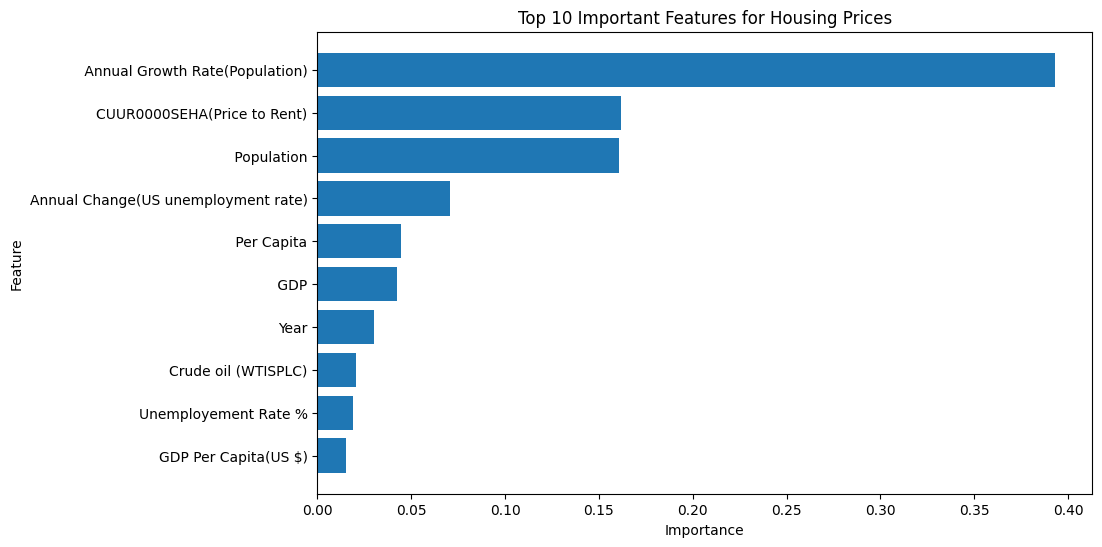

In [22]:
import matplotlib.pyplot as plt

# Extract feature importance (replace model with your trained model)
feature_importance = rf_model.feature_importances_

# Create a DataFrame to store feature names and importance scores
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importance})

# Sort features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the top N important features (change N to your desired number)
top_n = 10  # You can change this to the number of top features you want to display
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'][:top_n], feature_importance_df['Importance'][:top_n])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top {} Important Features for Housing Prices'.format(top_n))
plt.gca().invert_yaxis()  # Reverse the order to display the most important at the top
plt.show()


From the visual it is clear that the top ten features which affected the US house pricing over the past 20 years.